In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

df = pd.read_csv('../Data/Aluguel/aluguel_duas_variaveis_com_ruido.csv')

In [2]:
df.head()

,Area,Quartos,Preco
0,132,2,3786.649334
1,136,5,4694.382578
2,101,3,3472.955795
3,218,1,5452.604056
4,50,3,2590.143495


In [4]:
# Separando os dados em treino e teste
# X = df[['Area']]
X = df[['Area' ,'Quartos']]
y = df['Preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Printando os dados de treino e teste
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())




,Area
249,187
433,180
19,78
322,146
332,77


,Area
361,252
73,192
374,62
155,249
104,125


249    4721.441656
433    4270.988818
19     2829.042710
322    3629.758459
332    2209.319245
Name: Preco, dtype: float64

361    5645.423819
73     4631.826313
374    1883.795356
155    5922.649667
104    2921.202234
Name: Preco, dtype: float64

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

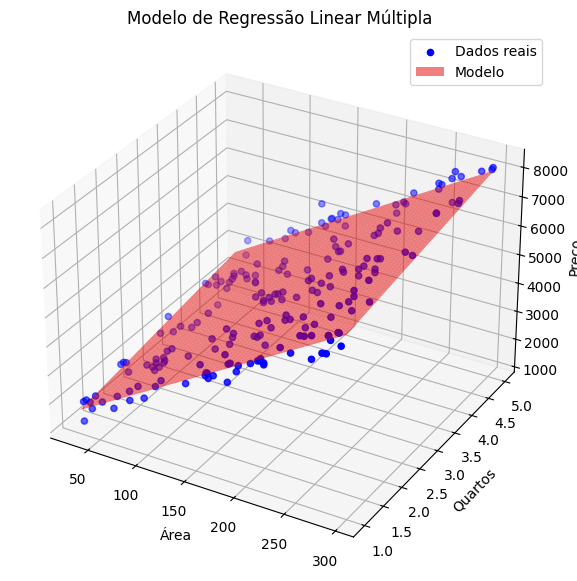

In [10]:
# Plotando o modelo em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos reais
ax.scatter(X_test['Area'], X_test['Quartos'], y_test, color='blue', label='Dados reais')

# Criando uma grade para plotar a superfície do modelo
x_surf = np.linspace(X_test['Area'].min(), X_test['Area'].max(), 100)
y_surf = np.linspace(X_test['Quartos'].min(), X_test['Quartos'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
pontos_grade = pd.DataFrame({'Area': x_surf.flatten(), 'Quartos': y_surf.flatten()})
z_surf = model.predict(pontos_grade).reshape(x_surf.shape)

# Plotando a superfície do modelo
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Modelo')

# Configurando os rótulos dos eixos
ax.set_xlabel('Área')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.legend()

plt.title('Modelo de Regressão Linear Múltipla')
plt.show()


In [11]:
# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
display(f'Erro quadrático médio: {mse}')

# Calculando a raiz do erro quadrático médio (RMSE)
rmse = np.sqrt(mse)
display(f'Raiz do erro quadrático médio: {rmse}')


# Calculando o coeficiente de determinação
r2 = r2_score(y_test, y_pred)
display(f'Coeficiente de determinação: {r2}')


'Erro quadrático médio: 55687.03329148516'

'Raiz do erro quadrático médio: 235.9810019715256'

'Coeficiente de determinação: 0.9791797428233109'

In [13]:
# Testando o modelo com um novo dado
novo_dado = pd.DataFrame({'Area': [100]})
preco_predito = model.predict(novo_dado)
display(f'Preco predito: {preco_predito[0]}')





'Preco predito: 2800.41890359601'